In [1]:
import glob
import json
import pandas as pd
import datetime
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
# gets every log from directory
all_logs = glob.glob("logs/*.json")

In [3]:
# formats all logs properly 
# key = session ID
# value = json w/ same format as what was originally held in nb metadata
formatted_logs = {}

for log in all_logs:
    f = open(log, 'r')
    
    # merges body sent from various HTTP Posts
    entries = f.read().split('}{')
    for i in range(len(entries)):
        entries[i] = '{' + entries[i] + '}'
    entries[0] = entries[0][1:]
    entries[-1] = entries[-1][:-1]
    formatted_log = json.loads(entries[0])
    for i in range(1,len(entries)):
        j = json.loads(entries[i])
        history = j['history']
        formatted_log['history'].extend(history)
    
    # separates user hash from file name (sessionID)
    names = log.split('_')
    formatted_log['userHash'] = names[0][5:]
    formatted_logs[names[1][:-5]] = formatted_log

    # get time user started ipynb
    formatted_log['startTime'] = formatted_log['history'][0]['time']


In [4]:
df = pd.DataFrame(formatted_logs).transpose().sort_values('userHash')

In [5]:
# TODO: Remove Jerry's and Doris's logs 

In [6]:
# Number of unique IPs data was sent from
df['userHash'].nunique()

29

In [7]:
# Creates userGroups based on when notebook was first used
def groupDate(x):
    if x['startTime'].date() <= datetime.date(2020, 11, 1):
        return 'RiseCamp'
    elif x['startTime'].date() > datetime.date(2020, 11, 3) and x['startTime'].date() <= datetime.date(2020, 11, 5):
        return 'UCSF'
    else:
        return 'Other'
df['startTime'] = pd.to_datetime(df['startTime'])
df['userGroup'] = df.apply(groupDate, axis=1)
df = df.sort_values('startTime')

In [8]:
df.sort_values('userGroup')

,nbName,history,userHash,startTime,userGroup
wnucqzzp4,cars_demo.ipynb,"[{'type': 'executeCodeCell', 'time': '2020-11-...",43d86a0c50b7674109e79f975a0b2ee5,2020-11-08 13:05:29.442000+00:00,Other
flvg4gvka,3-Export-Widget.ipynb,"[{'type': 'kernelKilled', 'time': '2020-11-02T...",3c3ba2212a0386c162b4ac9421da1c8d,2020-11-02 19:59:03.460000+00:00,Other
txodzcfin,0-Lux-Overview.ipynb,"[{'type': 'kernelReady', 'time': '2020-11-02T0...",6a14053cd956b7ef42aaad050bf9a872,2020-11-02 04:48:04.350000+00:00,Other
l5drnlm2i,1-Specify-Intent.ipynb,"[{'type': 'kernelReady', 'time': '2020-11-02T0...",6a14053cd956b7ef42aaad050bf9a872,2020-11-02 04:48:04.283000+00:00,Other
yng642san,4-Data-Playground.ipynb,"[{'type': 'kernelReady', 'time': '2020-11-02T0...",207d79f89a02fa955c1bb6fb2b88114f,2020-11-02 03:46:44.239000+00:00,Other
...,...,...,...,...,...
2b21sgaq4,2-Quick-Vis.ipynb,"[{'type': 'executeCodeCell', 'time': '2020-11-...",c970dc2661f9bafca1c9f7c959e5fcde,2020-11-04 21:52:03.810000+00:00,UCSF
m2xc6ec08,2-Quick-Vis.ipynb,"[{'type': 'executeCodeCell', 'time': '2020-11-...",52dacd9e8e026c076c886a89c4a84b9a,2020-11-04 21:52:17.359000+00:00,UCSF
q7onw2fq2,2-Quick-Vis.ipynb,"[{'type': 'executeCodeCell', 'time': '2020-11-...",aea7f8e69322a459e5639238c290c57e,2020-11-04 21:53:17.697000+00:00,UCSF
2gqzflfxq,3-Export-Widget.ipynb,"[{'type': 'executeCodeCell', 'time': '2020-11-...",52dacd9e8e026c076c886a89c4a84b9a,2020-11-04 21:58:24.082000+00:00,UCSF


In [9]:
def has_0(nbNames):
    for nbName in nbNames:
        if '0' in nbName:
            return 1
    return 0
def has_1(nbNames):
    for nbName in nbNames:
        if '1' in nbName:
            return 1
    return 0
def has_2(nbNames):
    for nbName in nbNames:
        if '2' in nbName:
            return 1
    return 0
def has_3(nbNames):
    for nbName in nbNames:
        if '3' in nbName:
            return 1
    return 0
def has_4(nbNames):
    for nbName in nbNames:
        if '4' in nbName:
            return 1
    return 0

In [10]:
# Groups users by hash and computes information as to whether user attempt notebook
grouped_df = df.groupby('userHash').agg(userGroup=('userGroup', sp.mode), time=('startTime', 'min'), 
                                        tried_0=('nbName', has_0), tried_1=('nbName', has_1), tried_2=('nbName', has_2),
                                        tried_3=('nbName', has_3), tried_4=('nbName', has_4))
grouped_df['userGroup'] = grouped_df['userGroup'].apply(lambda x: x[0][0])
grouped_df.sort_values('time')

,userGroup,time,tried_0,tried_1,tried_2,tried_3,tried_4
userHash,,,,,,,
bca87887a1cc89312f7d073fd007ea68,RiseCamp,2020-10-30 04:38:02.270000+00:00,1,1,0,1,0
1a735d0ee6a6f9d7fdab573b50851da7,RiseCamp,2020-10-30 11:14:12.703000+00:00,0,1,1,1,1
e0157f975b2aecbe652c4706db61a112,RiseCamp,2020-10-30 20:50:55.802000+00:00,1,1,1,1,1
46c3fa396f1071a92372dc40078b42f0,RiseCamp,2020-10-30 21:23:52.207000+00:00,0,1,1,1,0
a8c4ac0672f0751b58b4738ef4488877,RiseCamp,2020-10-30 21:36:27.644000+00:00,0,1,1,1,1
3ea0843857adef1f9fd1734eb9c0a562,RiseCamp,2020-10-30 21:44:23.298000+00:00,0,1,1,1,1
85b319c4eaae7abe4a4ce5275bee6447,RiseCamp,2020-10-30 21:46:00.558000+00:00,0,1,1,0,0
c2f6a6bec33711664fa1cfeaac9003cf,RiseCamp,2020-10-30 21:48:34.923000+00:00,0,1,1,1,0
a17c0c28b263bd9cb7e1bd810fd1dbff,RiseCamp,2020-10-30 21:51:45.741000+00:00,0,0,1,1,0


In [11]:
# Plots user attemps at tutorial notebooks
def plot_nb_progression(df, userGroup, n):
    nbNames = ['1-Specify-Intent.ipynb', '2-Quick-Vis.ipynb', '3-widget-vis-export.ipynb', '4-Data-Playground.ipynb'] 
    counts = [sum(df['tried_1']),sum(df['tried_2']),sum(df['tried_3']),sum(df['tried_4'])]
    plt.bar(nbNames , counts)
    plt.xticks(nbNames, rotation=45)
    plt.title(str(userGroup) + ' Attempts of Tutorial Notebooks n=' + str(n))
    plt.ylabel('Counts')
    plt.show()


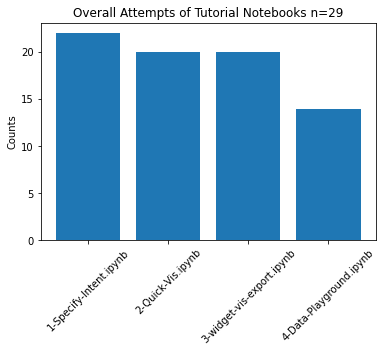

In [12]:
plot_nb_progression(grouped_df, 'Overall', 29)

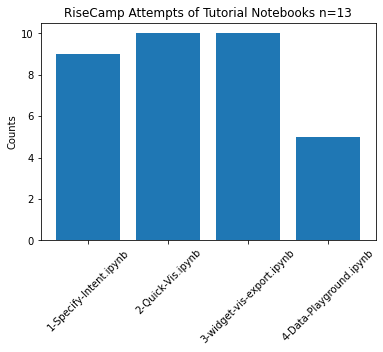

In [13]:
plot_nb_progression(grouped_df[grouped_df['userGroup']=='RiseCamp'], 'RiseCamp', 13)

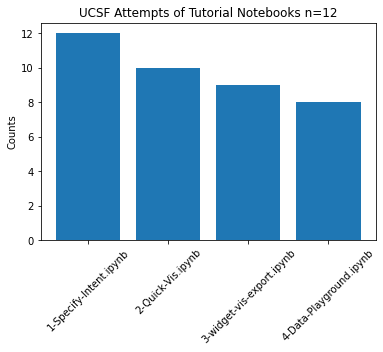

In [14]:
plot_nb_progression(grouped_df[grouped_df['userGroup']=='UCSF'], 'UCSF', 12)